In [1]:
#modules
import random
from scipy.stats import rankdata
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import ExcelWriter

In [2]:
#guessed balls
guessed_balls = 0

#lottery balls
lottery_balls = 1

#---------------------------------------------

#high level stats
plays = 0
ticket_spending = 0
winnings = 0

#---------------------------------------------

#record of winnings
jackpot = 0
five_white = 0
four_white_mega = 0
four_white = 0
three_white_mega = 0
three_white = 0
two_white_mega = 0
one_white_mega = 0
mega = 0
dud = 0
won = plays-dud

#----------------------------------------------

while guessed_balls != lottery_balls:
    
    guessed_balls = sorted(random.sample(range(1,70), 5))
    guessed_balls_set = set(guessed_balls)
    guessed_megaball = random.randint(1,25)
    guessed_balls.append(guessed_megaball)

    lottery_balls = sorted(random.sample(range(1,70), 5))
    lottery_balls_set = set(lottery_balls)
    lottery_megaball = random.randint(1,25)
    lottery_balls.append(lottery_megaball)
    
    difference_whites = len(guessed_balls_set.symmetric_difference(lottery_balls_set))
    plays +=1
    ticket_spending +=2
    
    #dud1
    if difference_whites == 10 and guessed_megaball != lottery_megaball:
        dud +=1
    
    #dud2
    elif difference_whites == 8 and guessed_megaball != lottery_megaball:
        dud +=1
 
    #dud3
    elif difference_whites == 6 and guessed_megaball != lottery_megaball:
        dud +=1
      
    #just megaball
    elif difference_whites == 10 and guessed_megaball == lottery_megaball:
        mega +=1
        winnings += 2

    #1white and megaball
    elif difference_whites == 8 and guessed_megaball == lottery_megaball:
        one_white_mega +=1
        winnings += 4
        
    #2white and megaball
    elif difference_whites == 6 and guessed_megaball == lottery_megaball:
        two_white_mega +=1
        winnings += 10 

    #3white
    elif difference_whites == 4 and guessed_megaball != lottery_megaball:
        three_white +=1
        winnings += 10

    #3white and megaball
    elif difference_whites == 4 and guessed_megaball == lottery_megaball:
        three_white_mega +=1
        winnings += 200
    
    #4white
    elif difference_whites == 2 and guessed_megaball != lottery_megaball:
        four_white +=1
        winnings += 500
   
    #4white and megaball
    elif difference_whites == 2 and guessed_megaball == lottery_megaball:
        four_white_mega +=1
        winnings += 10000
        
    #5white
    elif difference_whites == 0 and guessed_megaball != lottery_megaball:
        five_white +=1 
        winnings += 1000000
        
    #jackpot
    elif difference_whites == 0 and guessed_megaball == lottery_megaball:
        jackpot +=1
        winnings += 197000000
    

total plays:                         25,453,410
total duds:                          24,390,016
percent of plays that won any prize: 4%
-----------------------------------------------------
Prize Type                           Quantity Won
total just mega balls:               691,513
total 1white+mega:                   287,841
total 2white+mega:                   37,716
total 3white:                        43,769
total 3white+mega:                   1,855
total 4white:                        666
total 4white+mega:                   31
total 5white:                        2
total jackpot:                       1


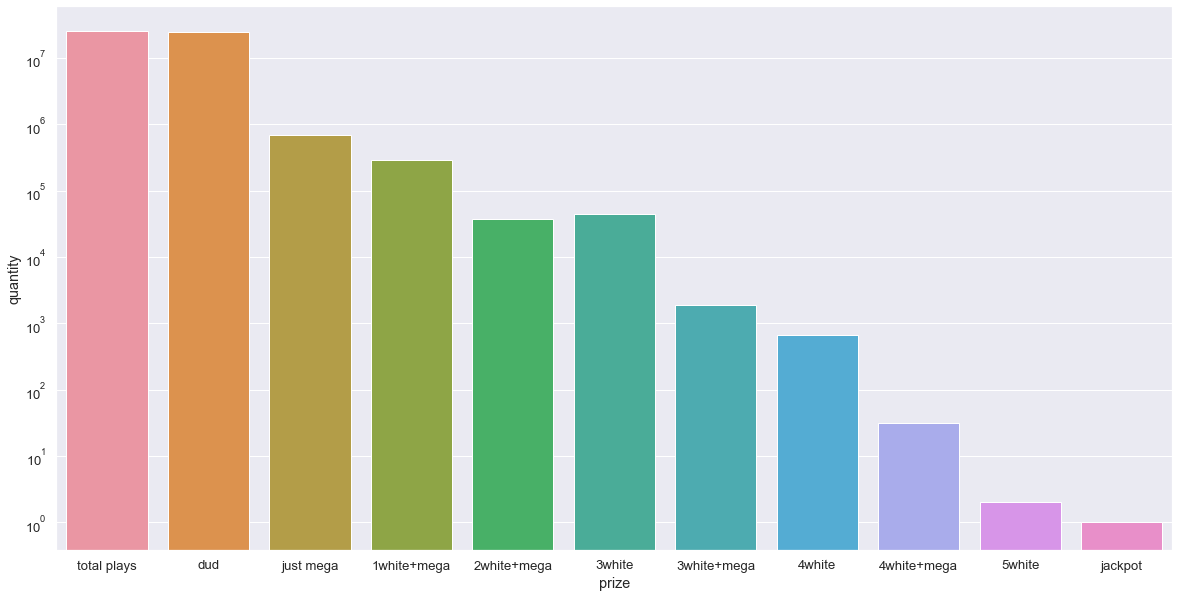

In [12]:
#Prize Quantity Won
#Barplot log
import seaborn as sb
sb.set_style("dark")
sb.set(font_scale=1.2) 
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax.set(yscale="log")
ds = {'prize':['total plays','dud', 'just mega', '1white+mega', '2white+mega', '3white','3white+mega', '4white', '4white+mega', '5white', 'jackpot'], 'quantity':[plays, dud, mega, one_white_mega, two_white_mega, three_white, three_white_mega, four_white, four_white_mega, five_white, jackpot]}
dx = pd.DataFrame(ds)
sb.barplot(x='prize', y='quantity', data=dx)


print("total plays:                        ", f"{plays:,d}")
print("total duds:                         ", f"{dud:,d}")
percent_wins = (1-(dud/plays))
percentage = "{:.0%}".format(percent_wins)
print("percent of plays that won any prize:", percentage)
print("-----------------------------------------------------")
print("Prize Type                          ", "Quantity Won")
print("total just mega balls:              ", f"{mega:,d}")
print("total 1white+mega:                  ", f"{one_white_mega:,d}")
print("total 2white+mega:                  ", f"{two_white_mega:,d}")
print("total 3white:                       ", f"{three_white:,d}")
print("total 3white+mega:                  ", f"{three_white_mega:,d}")
print("total 4white:                       ", f"{four_white:,d}")
print("total 4white+mega:                  ", f"{four_white_mega:,d}")
print("total 5white:                       ", f"{five_white:,d}")
print("total jackpot:                      ", f"{jackpot:,d}")

total plays:                         25,453,410
total duds:                          24,390,016
percent of plays that won any prize: 4%
-----------------------------------------------------
Prize Type                           Quantity Won
total just mega balls:               691,513
total 1white+mega:                   287,841
total 2white+mega:                   37,716
total 3white:                        43,769
total 3white+mega:                   1,855
total 4white:                        666
total 4white+mega:                   31
total 5white:                        2
total jackpot:                       1


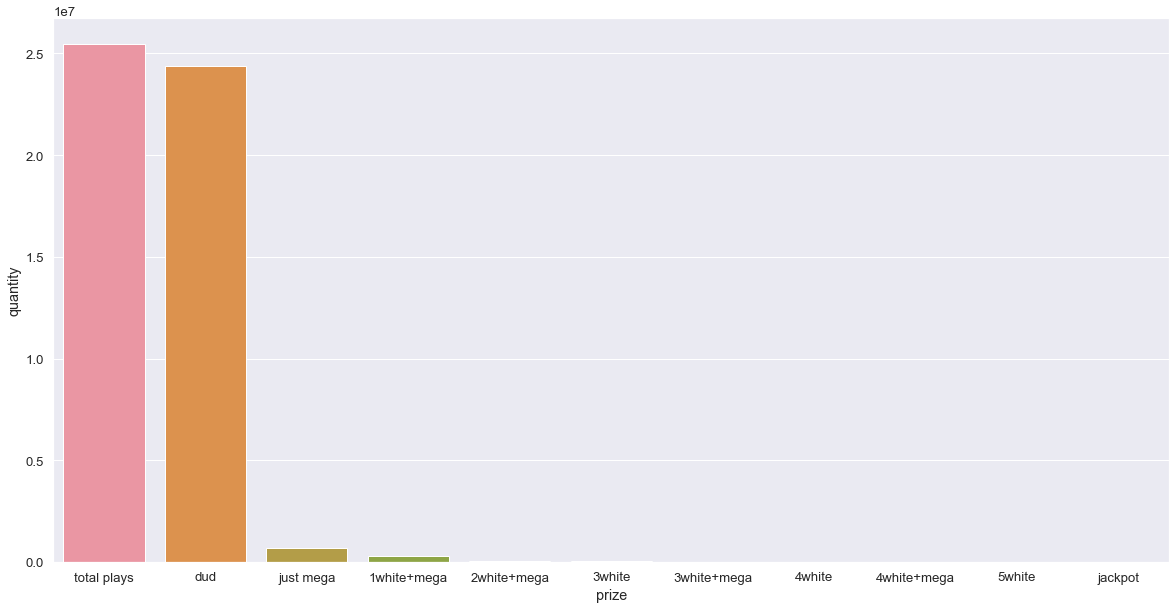

In [5]:
#Prize Quantity Won
#Barplot linear
import seaborn as sb
sb.set_style("dark")
sb.set(font_scale=1.2) 
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ds = {'prize':['total plays','dud', 'just mega', '1white+mega', '2white+mega', '3white','3white+mega', '4white', '4white+mega', '5white', 'jackpot'], 'quantity':[plays, dud, mega, one_white_mega, two_white_mega, three_white, three_white_mega, four_white, four_white_mega, five_white, jackpot]}
dx = pd.DataFrame(ds)
sb.barplot(x='prize', y='quantity', data=dx)


print("total plays:                        ", f"{plays:,d}")
print("total duds:                         ", f"{dud:,d}")
percent_wins = (1-(dud/plays))
percentage = "{:.0%}".format(percent_wins)
print("percent of plays that won any prize:", percentage)
print("-----------------------------------------------------")
print("Prize Type                          ", "Quantity Won")
print("total just mega balls:              ", f"{mega:,d}")
print("total 1white+mega:                  ", f"{one_white_mega:,d}")
print("total 2white+mega:                  ", f"{two_white_mega:,d}")
print("total 3white:                       ", f"{three_white:,d}")
print("total 3white+mega:                  ", f"{three_white_mega:,d}")
print("total 4white:                       ", f"{four_white:,d}")
print("total 4white+mega:                  ", f"{four_white_mega:,d}")
print("total 5white:                       ", f"{five_white:,d}")
print("total jackpot:                      ", f"{jackpot:,d}")

total spent:                       $ 50,906,820
total won:                         $ 203,363,240
-----------------------------------------------------
Prize Type                        Won
total just mega balls:             $ 1,383,026
total 1white+mega:                 $ 1,151,364
total 2white+mega:                 $ 377,160
total 3white:                      $ 437,690
total 3white+mega:                 $ 371,000
total 4white:                      $ 333,000
total 4white+mega:                 $ 310,000
total 5white:                      $ 2,000,000
total jackpot:                     $ 197,000,000


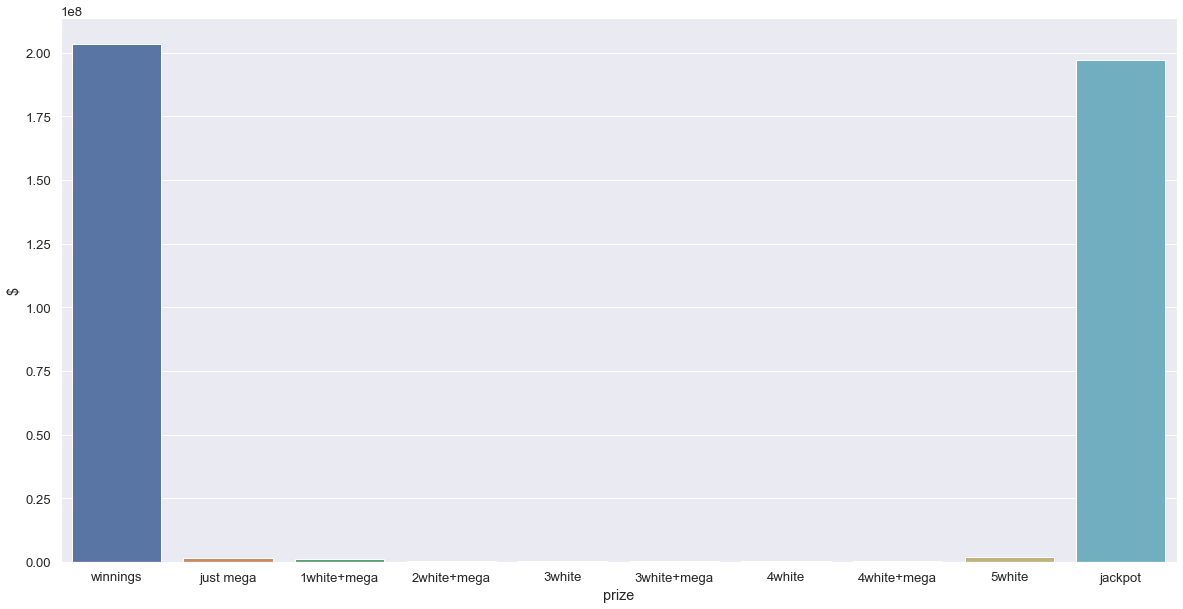

In [8]:
#How much $ came from each prize - variables
jackpot_winnings = jackpot * 197000000
five_white_winnings = five_white * 1000000
four_white_mega_winnings = four_white_mega * 10000
four_white_winnings = four_white * 500
three_white_mega_winnings = three_white_mega * 200
three_white_winnings = three_white * 10
two_white_mega_winnings = two_white_mega * 10
one_white_mega_winnings = one_white_mega * 4
mega_winnings = mega * 2

#$ Won per Prize
#Barplot linear
import seaborn as sb
sb.set_style("dark")
sb.set(font_scale=1.2) 
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ds = {'prize':['winnings','just mega','1white+mega', '2white+mega', '3white', '3white+mega','4white', '4white+mega', '5white', 'jackpot'],'$':[winnings, mega_winnings, one_white_mega_winnings,two_white_mega_winnings,three_white_winnings,three_white_mega_winnings,four_white_winnings,four_white_mega_winnings,five_white_winnings,jackpot_winnings,]}
dx = pd.DataFrame(ds)
sb.barplot(x='prize', y='$', data=dx)


print("total spent:                       $", f"{ticket_spending:,d}")
print("total won:                         $", f"{winnings:,d}")
print("-----------------------------------------------------")
print("Prize Type                       ", "Won")
print("total just mega balls:             $", f"{mega_winnings:,d}")
print("total 1white+mega:                 $", f"{one_white_mega_winnings:,d}")
print("total 2white+mega:                 $", f"{two_white_mega_winnings:,d}")
print("total 3white:                      $", f"{three_white_winnings:,d}")
print("total 3white+mega:                 $", f"{three_white_mega_winnings:,d}")
print("total 4white:                      $", f"{four_white_winnings:,d}")
print("total 4white+mega:                 $", f"{four_white_mega_winnings:,d}")
print("total 5white:                      $", f"{five_white_winnings:,d}")
print("total jackpot:                     $", f"{jackpot_winnings:,d}")

total spent:                       $ 50,906,820
total won:                         $ 203,363,240
-----------------------------------------------------
Prize Type                        Won
total just mega balls:             $ 1,383,026
total 1white+mega:                 $ 1,151,364
total 2white+mega:                 $ 377,160
total 3white:                      $ 437,690
total 3white+mega:                 $ 371,000
total 4white:                      $ 333,000
total 4white+mega:                 $ 310,000
total 5white:                      $ 2,000,000
total jackpot:                     $ 197,000,000


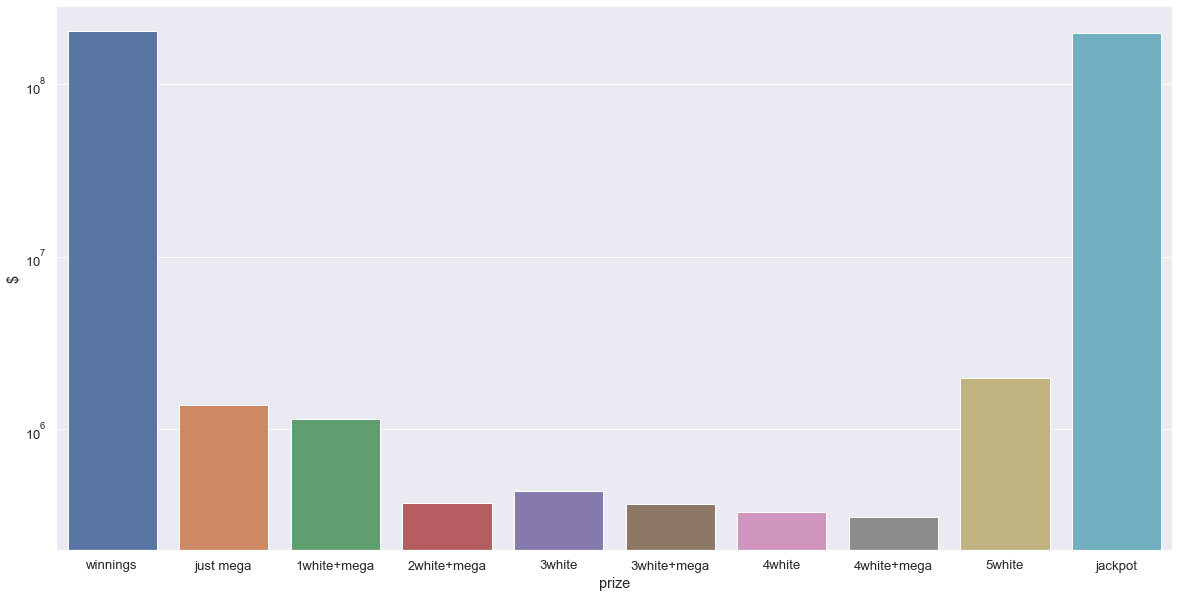

In [9]:
#$ Won per Prize
#Barplot linear
import seaborn as sb
sb.set_style("dark")
sb.set(font_scale=1.2) 
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax.set(yscale="log")
ds = {'prize':['winnings','just mega','1white+mega', '2white+mega', '3white', '3white+mega','4white', '4white+mega', '5white', 'jackpot'],'$':[winnings, mega_winnings, one_white_mega_winnings,two_white_mega_winnings,three_white_winnings,three_white_mega_winnings,four_white_winnings,four_white_mega_winnings,five_white_winnings,jackpot_winnings,]}
dx = pd.DataFrame(ds)
sb.barplot(x='prize', y='$', data=dx)


print("total spent:                       $", f"{ticket_spending:,d}")
print("total won:                         $", f"{winnings:,d}")
print("-----------------------------------------------------")
print("Prize Type                       ", "Won")
print("total just mega balls:             $", f"{mega_winnings:,d}")
print("total 1white+mega:                 $", f"{one_white_mega_winnings:,d}")
print("total 2white+mega:                 $", f"{two_white_mega_winnings:,d}")
print("total 3white:                      $", f"{three_white_winnings:,d}")
print("total 3white+mega:                 $", f"{three_white_mega_winnings:,d}")
print("total 4white:                      $", f"{four_white_winnings:,d}")
print("total 4white+mega:                 $", f"{four_white_mega_winnings:,d}")
print("total 5white:                      $", f"{five_white_winnings:,d}")
print("total jackpot:                     $", f"{jackpot_winnings:,d}")

In [4]:
#The winning ticket is:
print("the winning ticket is...", guessed_balls)

the winning ticket is... [28, 41, 48, 55, 68, 1]


In [11]:
quant_titles = ['total plays','dud', 'just mega', '1white+mega', '2white+mega', '3white','3white+mega', '4white', '4white+mega', '5white', 'jackpot']
quant_vals = [plays, dud, mega, one_white_mega, two_white_mega, three_white, three_white_mega, four_white, four_white_mega, five_white, jackpot]
constants = [-2, 0, 2,4, 10,10,200,500,10000,1000000,197000000]

array_quant_titles = np.array(quant_titles)
array_quant_vals = np.array(quant_vals)
array_constants =np.array(constants)

dataframe = pd.DataFrame({ 'titles': array_quant_titles,'vals': array_quant_vals, 'cost/wins': array_constants})
dataframe['p_l'] = dataframe['vals'] * dataframe['cost/wins']

dataframe

,titles,vals,cost/wins,p_l
0,total plays,25453410,-2,-50906820
1,dud,24390016,0,0
2,just mega,691513,2,1383026
3,1white+mega,287841,4,1151364
4,2white+mega,37716,10,377160
5,3white,43769,10,437690
6,3white+mega,1855,200,371000
7,4white,666,500,333000
8,4white+mega,31,10000,310000
9,5white,2,1000000,2000000
